In [1]:
import pandas as pd
import numpy as np
import os, pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, time

In [2]:
#list all files in data folder
files = os.listdir('dataset ')

In [3]:
datas={}
for file in files:
    if file != '.ipynb_checkpoints':
        datas[file.replace(".csv","")]=pd.read_csv('dataset /'+file, low_memory=False)

In [4]:
# merge of user id and trips 
partial_df = pd.merge(datas['trips'], datas['user_details'], on = 'userid')
partial_df

,tripid,userid,start_date,end_date,average_speed,max_speed,distance,duration,mood_rating,did_you_have_to_arrive,...,gender,age_range,lang,city,country,education_level,marital_status_household,number_people_household,labour_status_household,years_of_residence_household
0,#32:1461,o3QNooVleBR9WfbIaCqsaj3DlDl2,1970-01-01 00:25:57.159976,1970-01-01 00:25:57.160092,6.808,20.873,218.0,115283.0,-1.0,-1.0,...,Male,16-24,eng,Lisboa,PRT,NaN,NaN,NaN,NaN,NaN
1,#31:1587,o3QNooVleBR9WfbIaCqsaj3DlDl2,1970-01-01 00:25:57.160122,1970-01-01 00:25:57.160710,1.710,15.467,279.0,587407.0,-1.0,-1.0,...,Male,16-24,eng,Lisboa,PRT,NaN,NaN,NaN,NaN,NaN
2,#31:1449,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,1970-01-01 00:25:57.239471,1970-01-01 00:25:57.239782,4.451,11.279,385.0,311364.0,-1.0,-1.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
3,#30:1498,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,1970-01-01 00:25:57.243610,1970-01-01 00:25:57.243809,0.672,23.933,37.0,198138.0,-1.0,-1.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
4,#33:1435,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,1970-01-01 00:25:57.244477,1970-01-01 00:25:57.244842,5.727,44.140,580.0,364564.0,-1.0,-1.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67172,#130:20811,8g5HrJBPR6bhIdMr6qln8AAq4pp1,1970-01-01 00:26:14.959017,1970-01-01 00:26:14.960273,16.208,69.205,5655.0,1256016.0,4.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
67173,#131:20807,8g5HrJBPR6bhIdMr6qln8AAq4pp1,1970-01-01 00:26:14.942673,1970-01-01 00:26:14.944073,14.247,61.984,5539.0,1399630.0,3.0,1.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
67174,#132:20797,8g5HrJBPR6bhIdMr6qln8AAq4pp1,1970-01-01 00:26:14.937811,1970-01-01 00:26:14.939194,16.048,62.317,6167.0,1383441.0,3.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
67175,#133:20790,8g5HrJBPR6bhIdMr6qln8AAq4pp1,1970-01-01 00:26:14.923772,1970-01-01 00:26:14.925584,37.433,93.522,18842.0,1812088.0,3.0,1.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN


In [5]:
# merge of partial_df and activities
df = pd.merge(partial_df, datas['purposes'], on = 'tripid')
df

,tripid,userid,start_date,end_date,average_speed,max_speed,distance,duration,mood_rating,did_you_have_to_arrive,...,age_range,lang,city,country,education_level,marital_status_household,number_people_household,labour_status_household,years_of_residence_household,purpose
0,#32:1461,o3QNooVleBR9WfbIaCqsaj3DlDl2,1970-01-01 00:25:57.159976,1970-01-01 00:25:57.160092,6.808,20.873,218.0,115283.0,-1.0,-1.0,...,16-24,eng,Lisboa,PRT,NaN,NaN,NaN,NaN,NaN,Other
1,#31:1587,o3QNooVleBR9WfbIaCqsaj3DlDl2,1970-01-01 00:25:57.160122,1970-01-01 00:25:57.160710,1.710,15.467,279.0,587407.0,-1.0,-1.0,...,16-24,eng,Lisboa,PRT,NaN,NaN,NaN,NaN,NaN,Other
2,#31:1449,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,1970-01-01 00:25:57.239471,1970-01-01 00:25:57.239782,4.451,11.279,385.0,311364.0,-1.0,-1.0,...,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN,Home
3,#30:1498,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,1970-01-01 00:25:57.243610,1970-01-01 00:25:57.243809,0.672,23.933,37.0,198138.0,-1.0,-1.0,...,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN,Home
4,#33:1435,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,1970-01-01 00:25:57.244477,1970-01-01 00:25:57.244842,5.727,44.140,580.0,364564.0,-1.0,-1.0,...,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81537,#130:20811,8g5HrJBPR6bhIdMr6qln8AAq4pp1,1970-01-01 00:26:14.959017,1970-01-01 00:26:14.960273,16.208,69.205,5655.0,1256016.0,4.0,0.0,...,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN,Everyday_Shopping
81538,#131:20807,8g5HrJBPR6bhIdMr6qln8AAq4pp1,1970-01-01 00:26:14.942673,1970-01-01 00:26:14.944073,14.247,61.984,5539.0,1399630.0,3.0,1.0,...,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN,Work
81539,#132:20797,8g5HrJBPR6bhIdMr6qln8AAq4pp1,1970-01-01 00:26:14.937811,1970-01-01 00:26:14.939194,16.048,62.317,6167.0,1383441.0,3.0,0.0,...,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN,Personal_Tasks_Errands
81540,#133:20790,8g5HrJBPR6bhIdMr6qln8AAq4pp1,1970-01-01 00:26:14.923772,1970-01-01 00:26:14.925584,37.433,93.522,18842.0,1812088.0,3.0,1.0,...,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN,Work


In [19]:
df.groupby(['gender', 'purpose']).count()

tripid  userid  start_date  end_date  \
gender purpose                                                        
Female Business_Trip              910     910         910       910   
       Everyday_Shopping         2268    2268        2268      2268   
       Home                      5737    5737        5737      5737   
       Leisure_Hobby             5925    5925        5925      5925   
       Other                     2400    2400        2400      2400   
       Personal_Tasks_Errands    4517    4517        4517      4517   
       Pick_Up_Drop_Off          1764    1764        1764      1764   
       Work                      7664    7664        7664      7664   
Male   Business_Trip             1592    1592        1592      1592   
       Everyday_Shopping         3469    3469        3469      3469   
       Home                      9432    9432        9432      9432   
       Leisure_Hobby             7741    7741        7741      7741   
       Other                     4183    4183        4183      4183   
       Personal_Tasks_Errands    6924    6924        6924      6924   
       Pick_Up_Drop_Off          3219    3219        3219      3219   
       Work                     13639   13639       13639     13639   
Other  Business_Trip                7       7           7         7   
       Everyday_Shopping            5       5           5         5   
       Home                        33      33          33        33   
       Leisure_Hobby               20      20          20        20   
       Other                        9       9           9         9   
       Personal_Tasks_Errands      16      16          16        16   
       Pick_Up_Drop_Off             9       9           9         9   
       Work                        59      59          59        59   

                               average_speed  max_speed  distance  duration  \
gender purpose                                                                
Female Business_Trip                     910        910       910       910   
       Everyday_Shopping                2268       2268      2268      2268   
       Home                             5737       5737      5737      5737   
       Leisure_Hobby                    5925       5925      5925      5925   
       Other                            2400       2400      2400      2400   
       Personal_Tasks_Errands           4517       4517      4517      4517   
       Pick_Up_Drop_Off                 1764       1764      1764      1764   
       Work                             7664       7664      7664      7664   
Male   Business_Trip                    1592       1592      1592      1592   
       Everyday_Shopping                3469       3469      3469      3469   
       Home                             9432       9432      9432      9432   
       Leisure_Hobby                    7741       7741      7741      7741   
       Other                            4183       4183      4183      4183   
       Personal_Tasks_Errands           6924       6924      6924      6924   
       Pick_Up_Drop_Off                 3219       3219      3219      3219   
       Work                            13639      13639     13639     13639   
Other  Business_Trip                       7          7         7         7   
       Everyday_Shopping                   5          5         5         5   
       Home                               33         33        33        33   
       Leisure_Hobby                      20         20        20        20   
       Other                               9          9         9         9   
       Personal_Tasks_Errands             16         16        16        16   
       Pick_Up_Drop_Off                    9          9         9         9   
       Work                               59         59        59        59   

                               mood_rating  did_you_have_to_arrive  ...  \
gender purpose                                        

In [6]:
#Return relative frequency of purpose per each gender
purpose_dist = df.drop_duplicates(subset='tripid').groupby(['gender', 'purpose']).size() / df.dropna(subset=['purpose']).groupby('gender').size()
purpose_dist 

gender  purpose               
Female  Business_Trip             0.024018
        Everyday_Shopping         0.056566
        Home                      0.164759
        Leisure_Hobby             0.166298
        Other                     0.052974
        Personal_Tasks_Errands    0.105724
        Pick_Up_Drop_Off          0.035370
        Work                      0.219400
Male    Business_Trip             0.023347
        Everyday_Shopping         0.053089
        Home                      0.165163
        Leisure_Hobby             0.132333
        Other                     0.051336
        Personal_Tasks_Errands    0.105281
        Pick_Up_Drop_Off          0.036395
        Work                      0.236160
Other   Business_Trip             0.037975
        Everyday_Shopping         0.012658
        Home                      0.202532
        Leisure_Hobby             0.107595
        Other                     0.012658
        Personal_Tasks_Errands    0.088608
        Pick_Up_Drop_Of

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

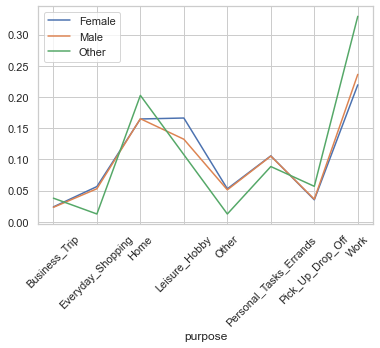

In [7]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=purpose_dist['Female'].index, y=purpose_dist['Female'].values,legend='brief',label='Female')
sns.lineplot(x=purpose_dist['Male'].index, y=purpose_dist['Male'].values,legend='brief',label='Male')
sns.lineplot(x=purpose_dist['Other'].index, y=purpose_dist['Other'].values,legend='brief',label='Other')


plt.xticks(rotation=45)

In [12]:
df['country'].unique()

array(['PRT', 'BEL', 'CHE', 'HRV', 'IND', 'FIN', 'PAK', 'FRA', 'ITA',
       'NOR', 'AFG', 'CZE', 'DEU', 'KOR', 'SRB', 'GRC', 'IRL', 'NLD',
       'GBR', 'ARM', 'SWE', 'AUT', 'SVK', 'ESP', 'DNK', 'RUS', 'POL'],
      dtype=object)

In [15]:
countries = df['country'].unique()
countries

array(['PRT', 'BEL', 'CHE', 'HRV', 'IND', 'FIN', 'PAK', 'FRA', 'ITA',
       'NOR', 'AFG', 'CZE', 'DEU', 'KOR', 'SRB', 'GRC', 'IRL', 'NLD',
       'GBR', 'ARM', 'SWE', 'AUT', 'SVK', 'ESP', 'DNK', 'RUS', 'POL'],
      dtype=object)

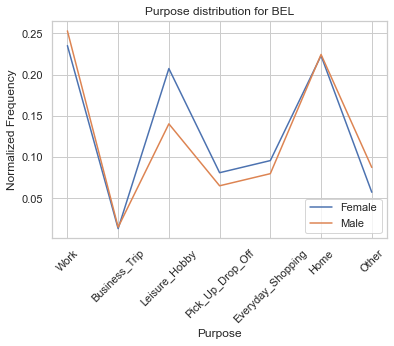

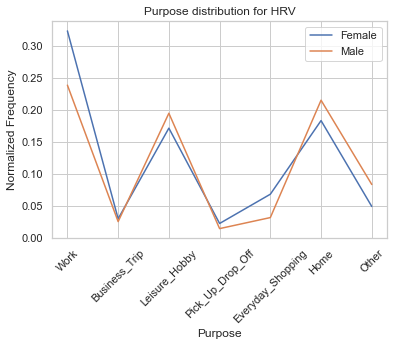

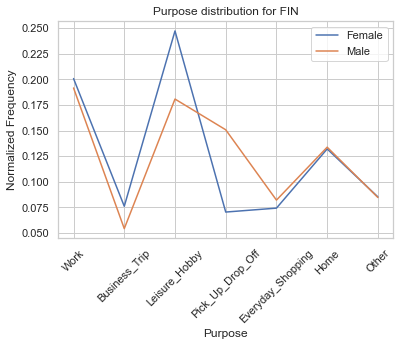

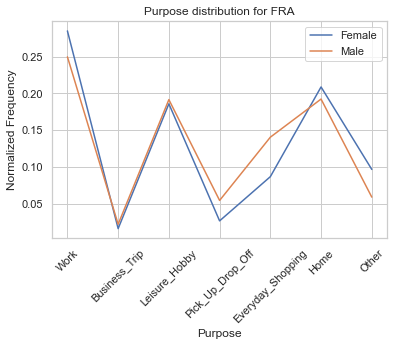

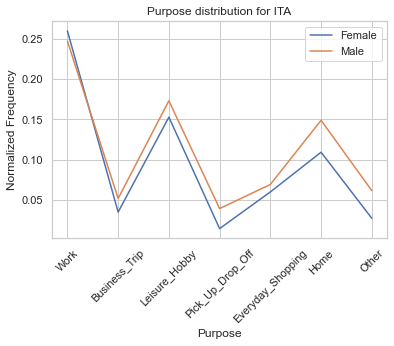

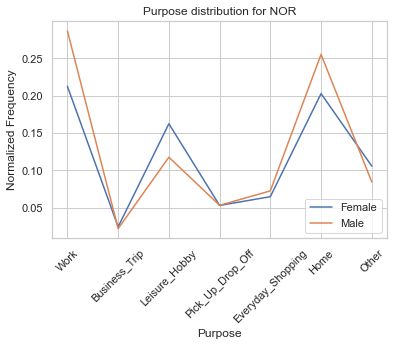

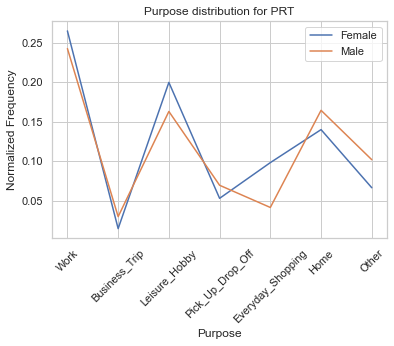

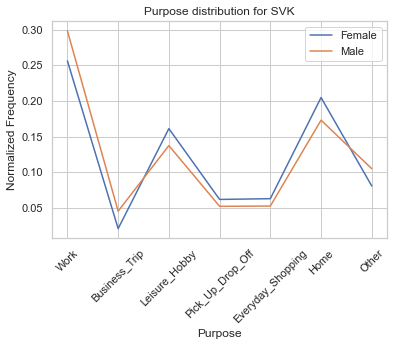

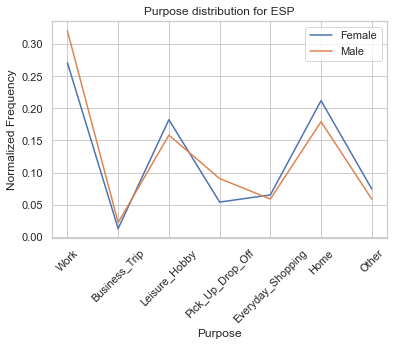

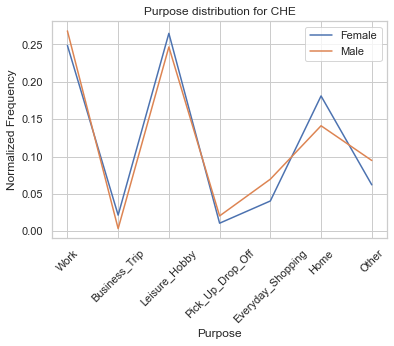

In [21]:
purpose_order = ['Work', 'Business_Trip', 'Leisure_Hobby', 'Personal_Task_Errands', 'Pick_Up_Drop_Off', 'Everyday_Shopping', 'Home', 'Other']

# Iterate over campaigns
for country in ['BEL', 'HRV', 'FIN', 'FRA', 'ITA', 'NOR', 'PRT', 'SVK', 'ESP', 'CHE']:
    # Filter data for the current country
    country_data = df[df['country'] == country]

    # Calculate time distribution
    purpose_dist = country_data.groupby(['gender', 'purpose']).size() / country_data.dropna(subset=['purpose']).groupby(['gender']).size()
    purpose_dist = purpose_dist.reindex(purpose_order, level='purpose')
    
    # Plot the graph for the current campaign
    sns.lineplot(x=purpose_dist['Female'].index, y=purpose_dist['Female'].values, legend='brief', label='Female')
    sns.lineplot(x=purpose_dist['Male'].index, y=purpose_dist['Male'].values, legend='brief', label='Male')
    #sns.lineplot(x=time_dist['Other'].index, y=time_dist['Other'].values, legend='brief', label='Other')
    
    plt.xticks(rotation=45)
    plt.title(f'Purpose distribution for {country}')
    plt.xlabel('Purpose')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.show()
